In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', -1)
pd.set_option('display.expand_frame_repr', False)

In [3]:
deliveries = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\deliveries_updated.csv')
matches = pd.read_csv('Desktop\MAS\DATASET\MAS-ACA-Masterclass-main\MAS-ACA-Masterclass-main\CSV Files\matches_updated_mens_ipl.csv')

In [4]:
df = deliveries.copy()
mdf = matches.copy()

In [5]:
mdf.head(10)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592
2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,Kolkata Knight Riders,NaN,6,CA Lynn,NaN,NaN,Saurashtra Cricket Association Stadium,NaN,field,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593
3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,Rising Pune Supergiant,NaN,6,GJ Maxwell,NaN,NaN,Holkar Cricket Stadium,NaN,field,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594
4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,Delhi Daredevils,15.0,6,KM Jadhav,NaN,NaN,M.Chinnaswamy Stadium,NaN,bat,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595
5,NaN,Indian Premier League,2017-04-09,male,N Pandit,Sunrisers Hyderabad,Sunrisers Hyderabad,NJ Llong,M Nayyar,2017,Gujarat Lions,NaN,6,Rashid Khan,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,AY Dandekar,NaN,Sunrisers Hyderabad,A Deshmukh,6.0,NaN,9.0,1082596
6,NaN,Indian Premier League,2017-04-09,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,S Chaturvedi,2017,Kolkata Knight Riders,NaN,6,N Rana,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,7.0,NaN,4.0,1082597
7,NaN,Indian Premier League,2017-04-10,male,R Pandit,Kings XI Punjab,Royal Challengers Bangalore,C Shamshuddin,Chinmay Sharma,2017,Royal Challengers Bangalore,NaN,6,AR Patel,NaN,NaN,Holkar Cricket Stadium,NaN,bat,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,8.0,NaN,8.0,1082598
8,NaN,Indian Premier League,2017-04-11,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,J Srinath,2017,Delhi Daredevils,97.0,6,SV Samson,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,A Nand Kishore,NaN,Delhi Daredevils,AY Dandekar,9.0,NaN,NaN,1082599
9,NaN,Indian Premier League,2017-04-12,male,K Srinivasan,Mumbai Indians,Mumbai Indians,CK Nandan,M Nayyar,2017,Sunrisers Hyderabad,NaN,6,JJ Bumrah,NaN,NaN,Wankhede Stadium,NaN,field,Mumbai,YC Barde,NaN,Mumbai Indians,Nitin Menon,10.0,NaN,4.0,1082600


In [6]:
df.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
main_df = pd.merge(df, mdf, on = 'matchId', how = 'left')

In [8]:
main_df.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN


In [9]:
main_df['date'] = pd.to_datetime(mdf['date'])

In [10]:
main_df['year'] = main_df['date'].dt.year

In [11]:
main_df['total_runs'] = main_df['batsman_runs'] + main_df['extras']
main_df['isdot'] = main_df['total_runs'].apply(lambda x: 1 if x == 0 else 0)
main_df['isone'] = main_df['total_runs'].apply(lambda x: 1 if x == 1 else 0)
main_df['istwo'] = main_df['total_runs'].apply(lambda x: 1 if x == 2 else 0)
main_df['isthree'] = main_df['total_runs'].apply(lambda x: 1 if x == 3 else 0)
main_df['isfour'] = main_df['total_runs'].apply(lambda x: 1 if x == 4 else 0)
main_df['issix'] = main_df['total_runs'].apply(lambda x: 1 if x == 6 else 0)

In [12]:
def balls_per_boundaries(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1
    
def balls_per_dismissals(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1

In [13]:
def batsman_stats(main_df, current_innings):
    

    main_df = main_df[main_df.inning == current_innings]
    main_df.reset_index(inplace = True, drop = True)


    main_df['IsDot'] = main_df['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    main_df['IsOne'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0)
    main_df['IsTwo'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0)
    main_df['IsThree'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0)
    main_df['IsFour'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0)
    main_df['IsSix'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0)
   
    runs = pd.DataFrame(main_df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'})
    balls = pd.DataFrame(main_df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId': 'balls'})
    innings = pd.DataFrame(main_df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns ={'matchId':'innings'})
    dismissals = pd.DataFrame(main_df.groupby(['batsman'])['player_dismissed'].count().reset_index().rename(columns = {'player_dismissed':'dismissals'}))
    sixes = pd.DataFrame(main_df.groupby(['batsman'])['IsSix'].sum().reset_index().rename(columns = {'IsSix':'sixes'}))
    fours = pd.DataFrame(main_df.groupby(['batsman'])['IsFour'].sum().reset_index().rename(columns = {'IsFour':'fours'}))
    dots = pd.DataFrame(main_df.groupby(['batsman'])['IsDot'].sum()).reset_index().rename(columns = {'IsDot': 'dots'})

    main_df = pd.merge(innings, runs, on = 'batsman').merge(balls, on ='batsman').merge(dots, on ='batsman').merge(dismissals, on ='batsman').merge(fours, on ='batsman').merge(sixes, on ='batsman')
    
    main_df['RPI'] = main_df.apply(lambda x: (x['runs']/x['innings']), axis = 1)
    main_df['SR'] = main_df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    main_df['BPB'] = main_df.apply(lambda x: balls_per_boundaries (x['balls'], (x['sixes'] + x['fours'])), axis = 1)
    main_df['BPD'] = main_df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis = 1)
    main_df['Dot%'] = main_df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    
    return main_df

In [14]:
def bowlerswk(dismissal_kind, player_dismissed):
    if type(player_dismissed) == str:
        if dismissal_kind in ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']:
            return 1
        else:
            return 0
    else:
        return 0
    
def runs_per_dismissals(runs, dismissals):
    if dismissals > 0 :
        return runs/dismissals
    elif (runs == 0):
        return 1000
    else:
        return runs/1

In [15]:
def bowler_stats(main_df, current_innings):
    
   
    main_df = main_df[main_df.inning == current_innings]
    main_df.reset_index(inplace = True, drop = True)

    main_df['bowlerswk'] = main_df.apply(lambda x: bowlerswk(x['dismissal_kind'], x['player_dismissed']), axis = 1)
    main_df['total_runs'] = main_df['batsman_runs'] + main_df['extras']
    main_df['isdot'] = main_df['total_runs'].apply(lambda x: 1 if x == 0 else 0)
    main_df['isone'] = main_df['total_runs'].apply(lambda x: 1 if x == 1 else 0)
    main_df['istwo'] = main_df['total_runs'].apply(lambda x: 1 if x == 2 else 0)
    main_df['isthree'] = main_df['total_runs'].apply(lambda x: 1 if x == 3 else 0)
    main_df['isfour'] = main_df['total_runs'].apply(lambda x: 1 if x == 4 else 0)
    main_df['issix'] = main_df['total_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(main_df.groupby(['bowler'])['total_runs'].sum()).reset_index().rename(columns = {'total_runs':'runs'})
    balls = pd.DataFrame(main_df.groupby(['bowler'])['ball'].count()).reset_index().rename(columns = {'ball':'balls'})
    overs = pd.DataFrame(main_df.groupby(['bowler'])['ball'].count()/6).reset_index().rename(columns = {'ball':'overs'})
    dismissals = pd.DataFrame(main_df.groupby(['bowler'])['bowlerswk'].sum()).reset_index().rename(columns = {'bowlerswk':'dismissals'})
    innings = pd.DataFrame(main_df.groupby(['bowler'])['matchId'].apply(lambda x : len(list(np.unique(x))))).reset_index().rename(columns = {'matchId':'innings'})
    dots = pd.DataFrame(main_df.groupby(['bowler'])['isdot'].sum()).reset_index().rename(columns = {'isdot':'dots'})
    sixes = pd.DataFrame(main_df.groupby(['bowler'])['issix'].sum()).reset_index().rename(columns = {'issix':'sixes'})
    fours = pd.DataFrame(main_df.groupby(['bowler'])['isfour'].sum()).reset_index().rename(columns = {'isfour':'fours'})

    main_df = pd.merge(innings, runs, on = 'bowler').merge(balls, on = 'bowler').merge(overs, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler').merge(fours, on = 'bowler').merge(sixes, on = 'bowler')
    
    main_df['SR'] = main_df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis = 1)
    main_df['Dot%'] = main_df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    main_df['Eco'] = main_df.apply(lambda x: 6*(x['runs']/x['balls']), axis = 1)
    main_df['AVG'] = main_df.apply(lambda x: runs_per_dismissals(x['runs'], x['dismissals']), axis = 1 )
    
    
    return main_df

In [16]:
bts1_df = batsman_stats(main_df, 1)
bts2_df = batsman_stats(main_df, 2)
bls1_df = bowler_stats(main_df, 1)
bls2_df = bowler_stats(main_df, 2)


In [17]:
bowler_stats(main_df, 2)

,bowler,innings,runs,balls,overs,dismissals,dots,fours,sixes,SR,Dot%,Eco,AVG
0,A Ashish Reddy,12,252,172,28.666667,11,53,16,13,15.636364,30.813953,8.790698,22.909091
1,A Chandila,6,103,114,19.000000,8,52,2,6,14.250000,45.614035,5.421053,12.875000
2,A Choudhary,3,72,56,9.333333,2,24,7,3,28.000000,42.857143,7.714286,36.000000
3,A Dananjaya,1,47,25,4.166667,0,6,2,4,25.000000,24.000000,11.280000,47.000000
4,A Flintoff,1,11,18,3.000000,1,10,1,0,18.000000,55.555556,3.666667,11.000000
5,A Kumble,17,425,393,65.500000,18,159,36,13,21.833333,40.458015,6.488550,23.611111
6,A Mishra,83,2165,1797,299.500000,99,630,116,96,18.151515,35.058431,7.228715,21.868687
7,A Mithun,6,183,119,19.833333,2,37,21,6,59.500000,31.092437,9.226891,91.500000
8,A Nehra,44,1233,968,161.333333,47,393,144,34,20.595745,40.599174,7.642562,26.234043
9,A Nel,1,31,18,3.000000,1,7,3,2,18.000000,38.888889,10.333333,31.000000


In [18]:
def get_phase(over):
    if over < 6:
        return 'PowerPlay'
    elif over < 15:
        return 'Middle'
    else:
        return 'Death'

In [19]:
main_df['phase'] = main_df['over'].apply(lambda x: get_phase(x))

In [20]:
def ByCustom(main_df, current_innings, current_venue, current_phase, current_opposition, current_batsman):
    

    main_df = main_df[main_df.inning == current_innings]
    main_df = main_df[main_df.venue == current_venue]
    main_df = main_df[main_df.phase == current_phase]
    main_df = main_df[main_df.bowling_team == current_opposition]
    main_df = main_df[main_df.batsman == current_batsman]
    
    main_df.reset_index(inplace = True, drop = True)


    main_df['IsDot'] = main_df['total_runs'].apply(lambda x : 1 if x == 0 else 0)
    main_df['IsOne'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 1 else 0)
    main_df['IsTwo'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 2 else 0)
    main_df['IsThree'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 3 else 0)
    main_df['IsFour'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 4 else 0)
    main_df['IsSix'] = main_df['batsman_runs'].apply(lambda x : 1 if x == 6 else 0)
   
    runs = pd.DataFrame(main_df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs': 'runs'})
    balls = pd.DataFrame(main_df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId': 'balls'})
    innings = pd.DataFrame(main_df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns ={'matchId':'innings'})
    dismissals = pd.DataFrame(main_df.groupby(['batsman'])['player_dismissed'].count().reset_index().rename(columns = {'player_dismissed':'dismissals'}))
    sixes = pd.DataFrame(main_df.groupby(['batsman'])['IsSix'].sum().reset_index().rename(columns = {'IsSix':'sixes'}))
    fours = pd.DataFrame(main_df.groupby(['batsman'])['IsFour'].sum().reset_index().rename(columns = {'IsFour':'fours'}))
    dots = pd.DataFrame(main_df.groupby(['batsman'])['IsDot'].sum()).reset_index().rename(columns = {'IsDot': 'dots'})

    main_df = pd.merge(innings, runs, on = 'batsman').merge(balls, on ='batsman').merge(dots, on ='batsman').merge(dismissals, on ='batsman').merge(fours, on ='batsman').merge(sixes, on ='batsman')
    
    main_df['RPI'] = main_df.apply(lambda x: (x['runs']/x['innings']), axis = 1)
    main_df['SR'] = main_df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
    main_df['BPB'] = main_df.apply(lambda x: balls_per_boundaries (x['balls'], (x['sixes'] + x['fours'])), axis = 1)
    main_df['BPD'] = main_df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis = 1)
    main_df['Dot%'] = main_df.apply(lambda x: 100*(x['dots']/x['balls']), axis = 1)
    
    return main_df

In [21]:
ByCustom(main_df, 1, 'Wankhede Stadium', 'Middle', 'Mumbai Indians', 'V Kohli'  )

,batsman,innings,runs,balls,dots,dismissals,fours,sixes,RPI,SR,BPB,BPD,Dot%
0,V Kohli,2,50,43,6,1,1,2,25.0,116.27907,14.333333,43.0,13.953488


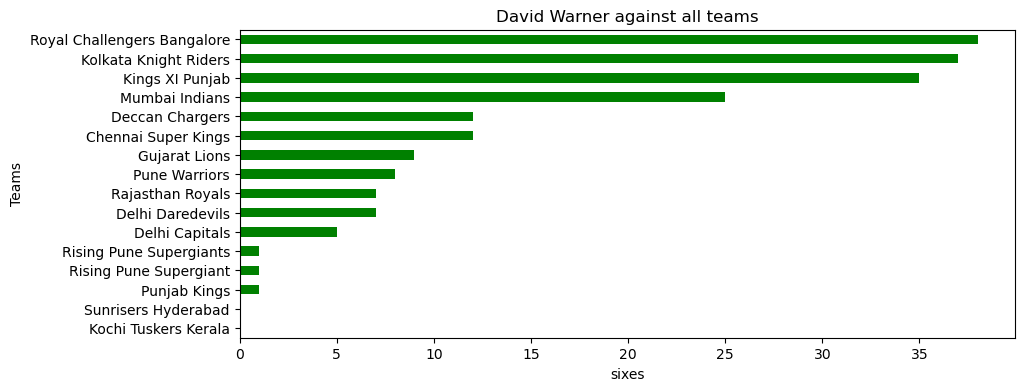

In [22]:
plt.figure(figsize = (10, 4))
main_df[main_df.batsman == 'DA Warner'].groupby(['bowling_team'])['issix'].sum().sort_values(ascending = True).plot(kind = 'barh', color = 'g')
plt.xlabel('sixes')
plt.ylabel('Teams')
plt.title('David Warner against all teams')
plt.show()